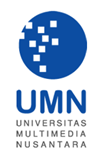
<center>
    <h3>UJIAN TENGAH SEMESTER GENAP TAHUN AKADEMIK 2023/2024</h3>
    <h3>PROGRAM STUDI INFORMATIKA</h3>
    <h3>FAKULTAS TEKNIK DAN INFORMATIKA</h3>
    <h3>UNIVERSITAS MULTIMEDIA NUSANTARA</h3>
</center>

---

<b>Petunjuk:</b>
<ul>
    <li>Gunakan file template jawaban UTS ini untuk <b>SOAL B</b></li>
    <li>Setiap butir pertanyaan memiliki bobot penilaiannya masing-masing</li>
    <li>Usahakan untuk mengerjakan setiap butir pertanyaan sesuai dengan perintah yang diberikan dan di tempat yang disediakan</li>
    <li>Tulis nama dan NIM Anda di dalam blok <i>cell</i> di bawah ini! Tampilkan dengan perintah <i>print</i>!</li>
</ul>

In [57]:
# input nama dan nim Anda di sini
nama = 'Fidel Brian Dava'
nim = '00000073866'
print(f'Nama:\n  {nama}')
print(f'NIM:\n  {nim}')

Nama:
  Fidel Brian Dava
NIM:
  00000073866


<u><h3>SOAL 1 (Total Bobot: 20%)</h3></u>
Gunakan metode Gauss-Seidel (metode iterative) untuk mendapatkan solusi dari sistem persamaan linear berikut dengan nilai threshold $𝜖=0.0001$:<br>
$ 3𝑥_1+𝑥_2−2𝑥_3=2 $<br>
$ −2𝑥_1−9𝑥_2-7𝑥_3=5 $<br>
$ 𝑥_1+𝑥_2+7x_3=−3 $<br>
Jangan lupa untuk mengecek kondisi kekonvergenan terlebih dahulu dengan melihat apakah matriks dominan secara diagonal atau tidak?

In [58]:
# check convergence condition - diagonally dominance (Bobot maks: 5%)

# import seluruh libraries yang dibutuhkan
import numpy as np

# INPUT THE MATRIX
A = np.array([[3,1,2], [-2,-9,-7], [1,1,7]])
B = np.array([2, 5, -3])

# Find diagonal coefficients
def isDiagonal(matrix):
    diagonal = np.diag(np.abs(matrix)) 
    sumRows = np.sum(np.abs(matrix), axis=1) - diagonal
    return np.all(diagonal >= sumRows)

# Find row sum without diagonal
def notDiagonal(matrix):
    diagonal = np.diag(matrix)
    sum_rows = np.sum(np.abs(matrix), axis=1)
    return sum_rows - diagonal

# check the condition
epsilon = 0.0001



In [59]:
# Gauss-Seidel iterative method (Bobot maks: 15%)

# inisialisasi data awal
x = [0,0,0]

# metode Gauss-Seidel
if(isDiagonal(np.array(A)) == True):
    print("Metode Gauss-Seidel bisa dipakai")
else:
    notDiagonal(np.array(A))
for i in range(1000):
    xPrev = x.copy()
    for j in range(len(x)):
        sigma = sum(A[j][k] * x[k] for k in range(len(x)) if k != j)
        x[j] = (1 / A[j][j]) * (B[j] - sigma)
    error = max(abs((x[j] - xPrev[j]) / x[j]) for j in range(len(x)) if x[j] != 0)
    if error < epsilon:
        break
print("Solusi sistem persamaan linear:")
for i in range(len(x)):
    print(f"x{i+1} = {x[i]:.2f}")




Metode Gauss-Seidel bisa dipakai
Solusi sistem persamaan linear:
x1 = 1.16
x2 = -0.39
x3 = -0.54


<u><h3>SOAL 2 (Total Bobot: 20%)</h3></u>
<h3>Soal 2 A (Bobot: 10%)</h3>
Carilah nilai eigen dan vektor eigen untuk matrix
$$\begin{bmatrix} 1 & 2 & 1 \\ 1 & 3 & 2 \\ 1 & 4 & 2 \end{bmatrix}$$
dengan menggunakan Power method. Anda bisa mencoba dengan vektor awal [1, 0, 0] dan 10 kali iterasi.

In [60]:
# Finding max Eigenvalue and Eigenvector (Bobot maks: 10%)
import numpy as np
# define a normalize function
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n
# inisialisasi data awal
A = np.array([[1,2,1],[1,3,2],[1,4,2]])
x = np.array([1,0,0])

def powerMethod(initial_vector, matrix, iterator):
    for i in range(iterator):
        initial_vector = matrix @ initial_vector
        lambda_1, initial_vector = normalize(initial_vector)
    return lambda_1, initial_vector

# 

# eigenvalue dan eigenvector
eigenvalues, eigenvectors = powerMethod(x,A,10)
print("Eigen Value\n", eigenvalues)
print("\nEigen Vector\n", eigenvectors)


Eigen Value
 5.971960768887841

Eigen Vector
 [0.54568746 0.85656833 1.        ]


<h3>Soal 2 B (Bobot: 10%)</h3>
Carilah seluruh nilai eigen dan vektor eigen untuk permasalahan di Soal 2 A dengan menggunakan <i>built-in function</i> <b>eig</b> dari numpy.linalg!

In [61]:
# Finding all eigenvalues and eigenvectors using built-in function eig (Bobot maks: 10%)
# import seluruh libraries yang dibutuhkan
import numpy as np

# tampilkan seluruh eigenvalues dan eigenvectors dengan fungsi 'eig'

A = np.array([[1,2,1],[1,3,2],[1,4,2]])

eigenvectors, eigenvalues = np.linalg.eig(A)
print("Eigen Values\n",eigenvalues)
print("\nEigen Vector\n",eigenvectors)


Eigen Values
 [[-0.38285759 -0.93567397  0.18171141]
 [-0.60097347  0.10061581 -0.53826044]
 [-0.70160599  0.33821692  0.82295605]]

Eigen Vector
 [ 5.97196077  0.42346527 -0.39542603]


<u><h3>SOAL 3 (Total Bobot: 20%)</h3></u>
Misal diberikan data buatan yang diperoleh dengan formulasi $ 𝑥=𝑛𝑝.𝑙𝑖𝑛𝑠𝑝𝑎𝑐𝑒(0, 1, 101) $ dan $ 𝑦=15*𝑥+𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑜𝑚(𝑙𝑒𝑛(𝑥)) $.<br>
Gunakan metode Least Squares Regression (LSR) dengan fungsi estimasi yang didefinisikan sebagai $ 𝑦 ̂=𝛼_1 𝑥+ 𝛼_2 $.<br>
Bandingkan hasilnya dengan metode <b>Pseudo-inverse</b> dan <i>built-in function</i> <b>lstsq</b> dari numpy.<br>
Plot titik-titik data yang dihasilkan dari formulasi tersebut bersama dengan hasil pendekatan LSR-nya.

In [62]:
# bangun titik-titik data x dan y (Bobot: 2%)
x = np.linspace(0, 1, 101)
y = 15 * x + np.random.rand(len(x))

# bangun matrix A dan ubah y menjadi vektor kolom (Bobot: 2%)
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

# Direct Least Square Regression (Bobot: 5%)
DLSR = np.linalg.inv(A.T @ A) @ A.T @ y

# Pseudo-inverse method (Bobot: 3%)
pinv = np.linalg.pinv(A)
Pseudo = pinv @ y

# Built-in lstsq dari numpy (Bobot: 3%)
LSTSQ = np.linalg.lstsq(A, y, rcond=None)[0]


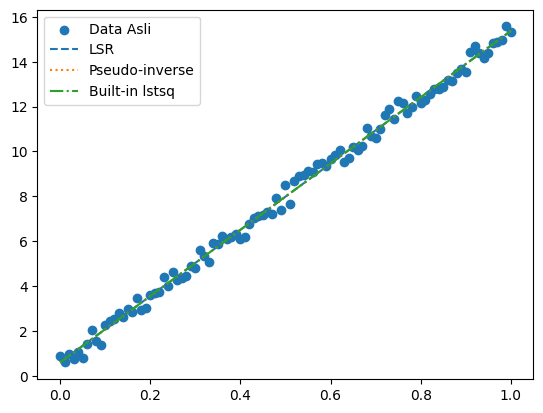

In [63]:
# Plot hasil (Bobot maks: 5%)

# import seluruh libraries yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plot

# sajikan plot hasil
plot.scatter(x, y, label="Data Asli")
plot.plot(x, A @ DLSR, label="LSR", linestyle='dashed')
plot.plot(x, A @ Pseudo, label="Pseudo-inverse", linestyle='dotted')
plot.plot(x, A @ LSTSQ, label="Built-in lstsq", linestyle='dashdot')

plot.legend()
plot.show()


<u><h3>SOAL 4 (Total Bobot: 20%)</h3></u>
<h3>Soal 4 A (Bobot: 10%)</h3>
Buat sebuah definisi fungsi <b>my_lagrange(x, y, X)</b> dimana output Y adalah hasil interpolasi Lagrange dari titik-titik data yang ada di x dan y yang dihitung terhadap data-data di X.<br>
Petunjuk: Gunakan <i>nested for-loop</i>, dimana <i>inner for-loop</i> digunakan untuk menghitung hasil kali dari Lagrange basis polynomial dan <i>outer for-loop</i> digunakan untuk menghitung jumlahan dari Lagrange polynomial. Jangan menggunakan fungsi lagrange yang tersedia di scipy.

In [64]:
# my_lagrange function (Bobot maks: 10%)

# definisi fungsi my_lagrange(x,y,X)
def my_lagrange(x, y, X):
    a = len(x)
    b = len(X)
    c = np.zeros(b)
    
    for j in range(b):
        for i in range(a):
            p = 1
            for k in range(a):
                if k != i:
                    p *= (X[j]-x[k])/(x[i]-x[k])
            c[j] += p*y[i]
    
    return c




<h3>Soal 4 B (Bobot: 10%)</h3>
Dengan menggunakan fungsi yang telah didefinisikan pada Soal 4 A dan titik-titik data dummy yang didefinisikan sebagai berikut<br>
$ x = [0, 2, 4, 6, 8] $<br>
$ y = [3, 8, 4, 0, 2] $<br>
X adalah nilai-nilai di sumbu X mulai dari titik awal x hingga titik akhir x yang dibagi menjadi 100 bagian sama panjang<br>
Sajikan plot tiap titik data dan interpolasi Lagrange yang dihasilkan!

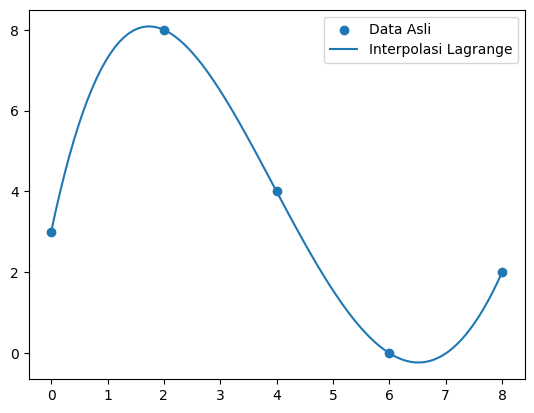

In [65]:
# bangun titik-titik data x, y, dan X (Bobot: 5%)


# Plot hasil (Bobot maks: 5%)
import numpy as np
import matplotlib.pyplot as plot

x = [0,2,4,6,8]
y = [3,8,4,0,2]

X = np.linspace(x[0], x[-1], 100)
Y = my_lagrange(x, y, X)

plot.scatter(x, y, label="Data Asli")
plot.plot(X, Y, label="Interpolasi Lagrange")
plot.legend()
plot.show()
